# 2nd review lesson
## Efficient Frontier

In [11]:
import pandas as pd
import numpy as np
import edhec_risk_kit_2 as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0,
                 parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')

In [26]:
ind.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [6]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [7]:
ind.columns = ind.columns.str.strip()

In [8]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [9]:
ind.shape

(1110, 30)

In [13]:
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

<AxesSubplot:>

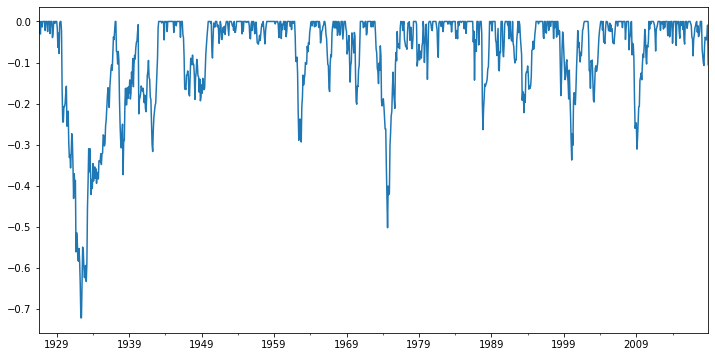

In [16]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [19]:
erk.var_gaussian(ind[["Fin", "Games", "Beer", "Smoke", "Books"]], modified=True)

Fin      0.075199
Games    0.100701
Beer     0.033881
Smoke    0.080292
Books    0.088675
dtype: float64

In [21]:
erk.var_gaussian(ind, modified=True).sort_values()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
Trans    0.065468
Servs    0.066112
Autos    0.069545
Util     0.071585
Hlth     0.071884
Paper    0.073181
Steel    0.074436
Fin      0.075199
Chems    0.079262
Txtls    0.079519
Clths    0.079707
Smoke    0.080292
Rtail    0.080437
Whlsl    0.080604
Oil      0.081244
Other    0.087270
ElcEq    0.087624
FabPr    0.088491
Books    0.088675
Cnstr    0.089668
Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

<AxesSubplot:>

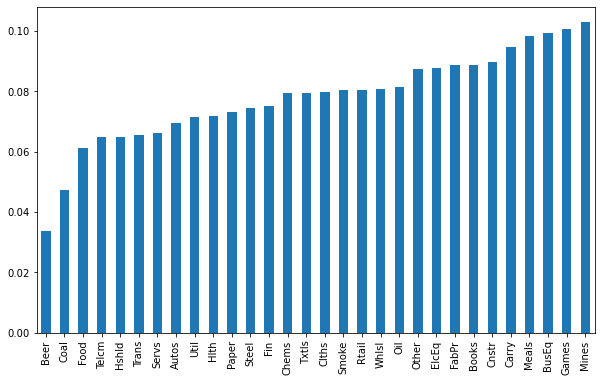

In [22]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(10,6))

<AxesSubplot:title={'center':'IU'}>

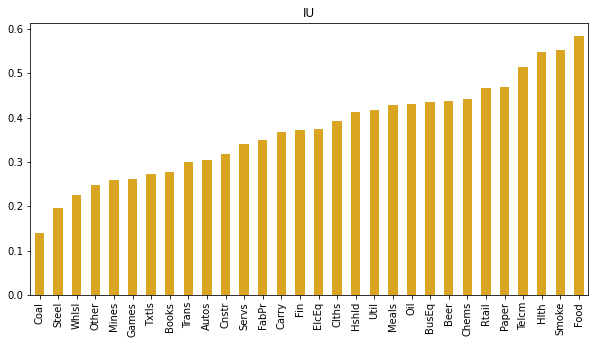

In [25]:
erk.sharpe_ratio(ind, 0.01, 12).sort_values().plot.bar(title="IU",
                                                      color="goldenrod",
                                                      figsize=(10,5))

<AxesSubplot:>

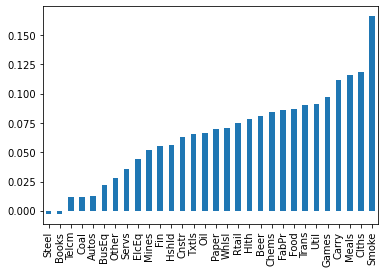

In [29]:
er = erk.annualize_rets(ind["2000":], 12)
er.sort_values().plot.bar()

In [31]:
cov = ind["2000":].cov()

In [32]:
cov()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.001277,0.000945,0.001302,0.001282,0.001136,0.000811,0.001103,0.000774,0.001254,0.001570,...,0.000928,0.000755,0.000728,0.001120,0.000937,0.000961,0.000896,0.000944,0.001124,0.000874
Beer,0.000945,0.001608,0.001103,0.000889,0.000751,0.000946,0.000805,0.000792,0.000879,0.001065,...,0.000742,0.000499,0.000521,0.000987,0.000840,0.000659,0.000665,0.000800,0.000842,0.000784
Smoke,0.001302,0.001103,0.004250,0.001177,0.001142,0.001013,0.000931,0.000910,0.001143,0.001072,...,0.001014,0.000768,0.000828,0.001207,0.000862,0.001143,0.000557,0.000944,0.001153,0.001119
Games,0.001282,0.000889,0.001177,0.005442,0.003231,0.001334,0.003145,0.001475,0.003245,0.004660,...,0.002449,0.003194,0.003767,0.002530,0.002606,0.002537,0.002336,0.002182,0.002971,0.002615
Books,0.001136,0.000751,0.001142,0.003231,0.003616,0.001162,0.002415,0.001291,0.002585,0.004015,...,0.002073,0.002178,0.002467,0.002297,0.002096,0.002166,0.001871,0.001572,0.002582,0.002051
Hshld,0.000811,0.000946,0.001013,0.001334,0.001162,0.001485,0.001103,0.000855,0.001164,0.001684,...,0.000876,0.000840,0.000929,0.001298,0.001047,0.000905,0.000808,0.000883,0.001101,0.001209
Clths,0.001103,0.000805,0.000931,0.003145,0.002415,0.001103,0.003730,0.000909,0.002493,0.003835,...,0.001724,0.001960,0.002445,0.002148,0.002294,0.001856,0.002270,0.002015,0.002412,0.001797
Hlth,0.000774,0.000792,0.000910,0.001475,0.001291,0.000855,0.000909,0.001594,0.001298,0.001455,...,0.001124,0.001227,0.001402,0.001129,0.001017,0.001195,0.000913,0.000862,0.001287,0.001259
Chems,0.001254,0.000879,0.001143,0.003245,0.002585,0.001164,0.002493,0.001298,0.003534,0.003632,...,0.001918,0.002261,0.002621,0.002475,0.002389,0.002013,0.001888,0.001810,0.002485,0.002143
Txtls,0.001570,0.001065,0.001072,0.004660,0.004015,0.001684,0.003835,0.001455,0.003632,0.007950,...,0.002481,0.002596,0.003278,0.003219,0.003124,0.002689,0.002869,0.002480,0.003379,0.002810


## Efficient Frotier Part II

In [35]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [36]:
l = ["Books", "Beer", "Fin", "Games"]
er[l]

Books   -0.002780
Beer     0.080598
Fin      0.055166
Games    0.096810
dtype: float64

In [39]:
cov.loc[l, l]

,Books,Beer,Fin,Games
Books,0.003616,0.000751,0.002582,0.003231
Beer,0.000751,0.001608,0.000842,0.000889
Fin,0.002582,0.000842,0.003101,0.002971
Games,0.003231,0.000889,0.002971,0.005442


In [40]:
weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

0.057448599249889765

In [41]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.04763120089946021

## 2-asset Frontier

In [43]:
l = ["Books", "Games"]

In [46]:
n_points = 25
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.04166667, 0.95833333]),
 array([0.08333333, 0.91666667]),
 array([0.125, 0.875]),
 array([0.16666667, 0.83333333]),
 array([0.20833333, 0.79166667]),
 array([0.25, 0.75]),
 array([0.29166667, 0.70833333]),
 array([0.33333333, 0.66666667]),
 array([0.375, 0.625]),
 array([0.41666667, 0.58333333]),
 array([0.45833333, 0.54166667]),
 array([0.5, 0.5]),
 array([0.54166667, 0.45833333]),
 array([0.58333333, 0.41666667]),
 array([0.625, 0.375]),
 array([0.66666667, 0.33333333]),
 array([0.70833333, 0.29166667]),
 array([0.75, 0.25]),
 array([0.79166667, 0.20833333]),
 array([0.83333333, 0.16666667]),
 array([0.875, 0.125]),
 array([0.91666667, 0.08333333]),
 array([0.95833333, 0.04166667]),
 array([1., 0.])]

In [50]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"Returns": rets, "Vol": vols})

<AxesSubplot:xlabel='Vol', ylabel='Returns'>

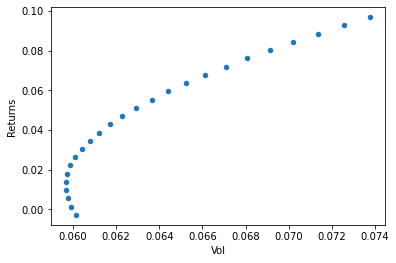

In [72]:
ef.plot.scatter(x="Vol", y="Returns")

(0.0, 0.1)

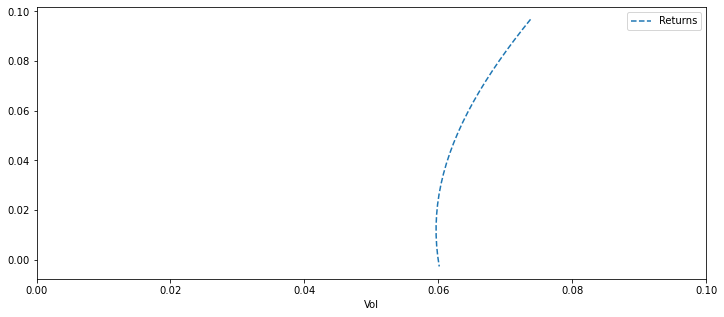

In [71]:
ef.plot.line(x="Vol", y="Returns", style="--", figsize=(12,5)).set_xlim(left=0, right=0.1)

## N-Asset Efficient Frontier

In [2]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit_2 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["2000":], 12)
cov = ind["2000":].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python
def optimal_weights(n_points, er, cov):
    """
    list of weights to run the potimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov) ## 목표 수익률을 입력했을 때, 가장 낮은 변동성을 가지는 weights를 반환
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols})
    return ef.plot.line(x="Volatility", y="Returns", style=style)
```

N개 asset을 다루려면 weights 변수만 바꿔주면 됨.

In [7]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np

<AxesSubplot:xlabel='Volatility'>

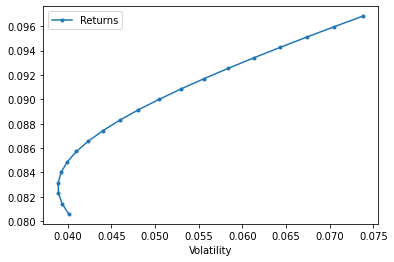

In [16]:
l = ["Beer", "Games"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [19]:
def minimize_vol(target_return, er, cov):
    """
    targer_return -> weights
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)  ## 초기 조건을 equal weights로 설정
    bounds = ((0.0, 1.0),)*n  ## 각각의 항목의 한계(0부터 1사이)
    return_is_target = {    ## 수익률이 목표수익률과 같아야 함
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {  ## 모든 weights의 합은 1
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess,
                      args=(cov,), method="SLSQP",
                      options={'disp': False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

In [23]:
w085 = minimize_vol(0.085, er[l], cov.loc[l, l])  ## 기대수익률이 0.085일 때 weight
vol085 = erk.portfolio_vol(w085, cov.loc[l, l])  ## 그 wegihts에서 vol
vol085

0.04007791236776678

In [24]:
w085

array([0.72848825, 0.27151175])

<AxesSubplot:xlabel='Volatility'>

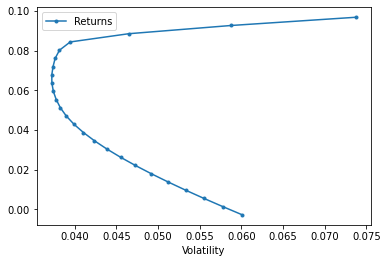

In [29]:
l = ["Games", "Fin", "Books", "Beer"]
erk.plot_ef(25, er[l], cov.loc[l,l])

In [1]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit_2 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [22]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np

def msr(riskfree_rate, er, cov):
    """
    Riskfree rate, er, covmat -> Weights
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, cov, er):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, cov, er), method="SLSQP",
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

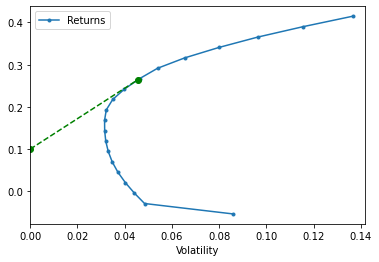

In [23]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

<AxesSubplot:xlabel='Volatility'>

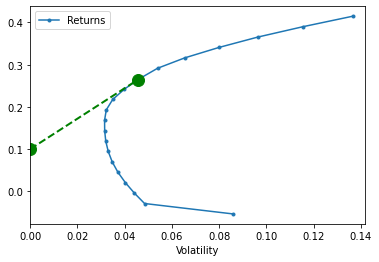

In [25]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

In [40]:
l = ["Food", "Steel"]
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [41]:
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [34]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [45]:
erk.msr(0.1, np.array([.115, .115809]), cov.loc[l,l])

array([0.7276134, 0.2723866])

<AxesSubplot:xlabel='Volatility'>

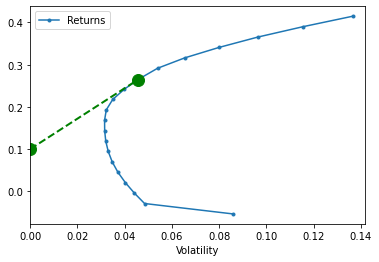

In [46]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

정확한 returns 추정이 불가능하기 때문에 Markowitz 방법을 쓰기 어려움.

GMV(Global minimum variance)는 returns 추정이 필요없음!

왜냐하면 모든 returns이 동일하다고 가정하고 msr을 구하면 최소vol이 구해지기 때문.

(실제로는 그냥 minimize vol만 하는 것)

EW(Equal weights)는 그냥 동일한 가중치. 분석이 필요없음

<AxesSubplot:xlabel='Volatility'>

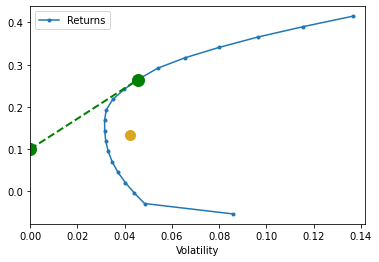

In [47]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

In [49]:
np.repeat(1, 100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:xlabel='Volatility'>

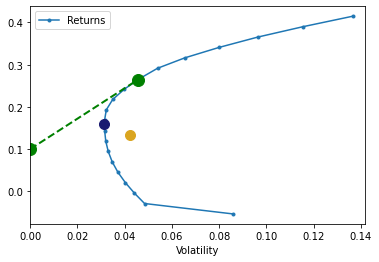

In [50]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

EW -> 아무것도 필요없음.

GMV -> Minimum vol만 구함. (expect return 필요없음!)